# Example of simple work with a Markov chain

We consider the same simple genetic model as in the slides. As in the updated slides, $p_{ij}=\mathbb{P}(S_i|S_j)$.

## Regular case
### Genetic example
We consider the following transition matrix:

In [110]:
P_reg = matrix(c(0.5, 0.25, 0,
                 0.5, 0.5, 0.5,
                 0, 0.25, 0.5),
               nr = 3, byrow = TRUE)
P_reg

0.5,0.25,0.0
0.5,0.50,0.5
0.0,0.25,0.5


Computing $P^2$, we find

In [111]:
P_reg %^% 2

0.375,0.25,0.125
0.500,0.50,0.500
0.125,0.25,0.375


that is, $P^2>0$ and thus the Markov chain is regular. As a consequence, to find the limiting probability vector, we compute the right eigenvector of $P$:

In [112]:
ev = eigen(P_reg)
ev$vectors[,1]/(sum(ev$vectors[,1]))

[1] 0.25 0.50 0.25

This matches the eigenvector found in the notes. To show sample realisations of the chain, we create the following function.

In [113]:
MC = function(p, P, nb_steps = 50) {
  # Check that the arguments make sense
  if (sum(p) != 1) {
    writeLines("Need a probability vector as initial condition")
    exit
  }
  if (sum(colSums(P)) != dim(P)[1]) {
    writeLines("Need a column stochastic matrix")
    exit
  }
  # Setup
  chain = matrix(p, nr = 1)
  # Run
  for (i in 2:nb_steps) {
    tmp = P%*% as.numeric(chain[dim(chain)[1],])
    prob = runif(1)
    idx = which(cumsum(tmp) >= prob)[1]
    tmp = rep(0, dim(chain)[2])
    tmp[idx] = 1
    chain = rbind(chain, tmp)
  }
  # Prepare output
  out = data.frame(step = 1:nb_steps, chain)
  colnames(out) = c("step", sprintf("s%d", 1:length(p)))
  # Return result
  return(out)
}

In [114]:
mc = MC(c(0,1,0), P_reg, 30)
colnames(mc) = c("step", "GG", "Gg", "gg")
head(mc)

,step,GG,Gg,gg
,<int>,<dbl>,<dbl>,<dbl>
X,1,0,1,0
tmp,2,0,1,0
tmp.1,3,1,0,0
tmp.2,4,0,1,0
tmp.3,5,1,0,0
tmp.4,6,1,0,0


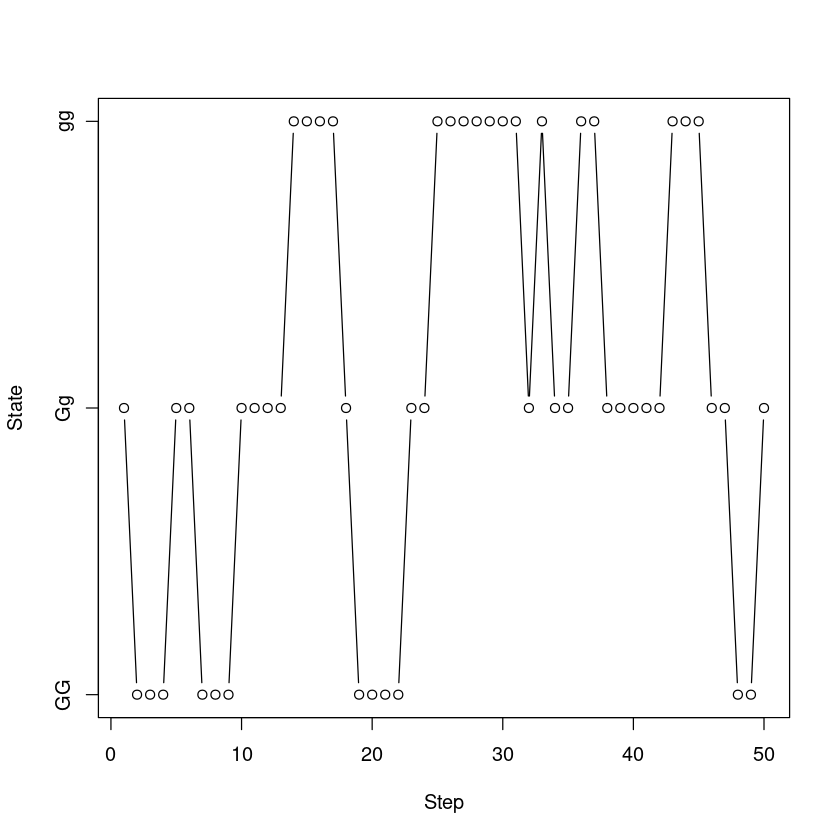

In [115]:
mc = MC(c(0,1,0), P_reg)
# To avoid getting stuck like I did in class, we rename the columns outside 
# of the function rather than have to change each time...
colnames(mc) = c("step", "GG", "Gg", "gg")
v = mc$GG + mc$Gg*2 + mc$gg*3  # See note below the figure
plot(mc$step, v, type = "b", xlab = "Step", ylab = "State", yaxt = "n")
axis(2, at = c(1,2,3), label = c("GG", "Gg", "gg"))

To explain the expression `v = mc$GG + mc$Gg*2 + mc$gg*3` used to create the plot.. For each row in the result matrix, given how we conduct the simulation, we know that only one of the columns will contain a 1, the remaining two will contain a zero. So if we weight entries in the first column with a weight 1, those in the second column using a 2 and those in the third with a 3, we know that if `v[i]=1` at step `i`, then the first column is the nonzero one, if `v[i]=2` at step `i`, then the second column is the nonzero one, etc. Plotting this value and labelling the y-axis accordingly then gives us what we want.

### A random walk

In [116]:
N = 11
P_reg2 = mat.or.vec(nr = N, nc = N)
P_reg2[1,1] = 0.75
P_reg2[2,1] = 0.25
P_reg2[N,N] = 0.75
P_reg2[N-1,N] = 0.25
for (i in 2:(N-1)) {
    P_reg2[i,i] = 0.5
    P_reg2[(i-1),i] = 0.25
    P_reg2[(i+1),i] = 0.25
}
P_reg2

0.75,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.75


,step,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,0,0,0,0,0,1,0,0,0,0,0
tmp,2,0,0,0,0,1,0,0,0,0,0,0
tmp.1,3,0,0,0,0,1,0,0,0,0,0,0
tmp.2,4,0,0,0,1,0,0,0,0,0,0,0
tmp.3,5,0,0,0,1,0,0,0,0,0,0,0
tmp.4,6,0,0,0,0,1,0,0,0,0,0,0


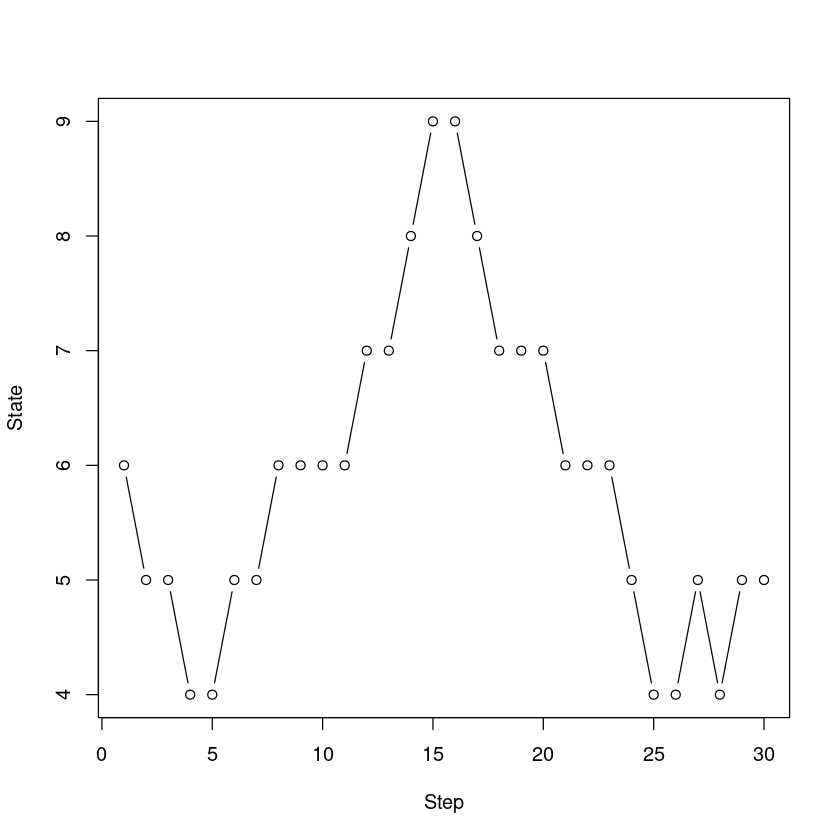

In [117]:
tsteps = 30
p = rep(0, N)
p[6] = 1
mc = MC(p, P_reg2, tsteps)
head(mc)
v = rep(0, tsteps)
for (i in 1:N) {
    v = v + i* mc[,(i+1)]
}
plot(mc$step, v, type = "b", xlab = "Step", ylab = "State")


For fun, let's see what happens when we much reduce the probability of staying in place and increase the probability of moving left or right.

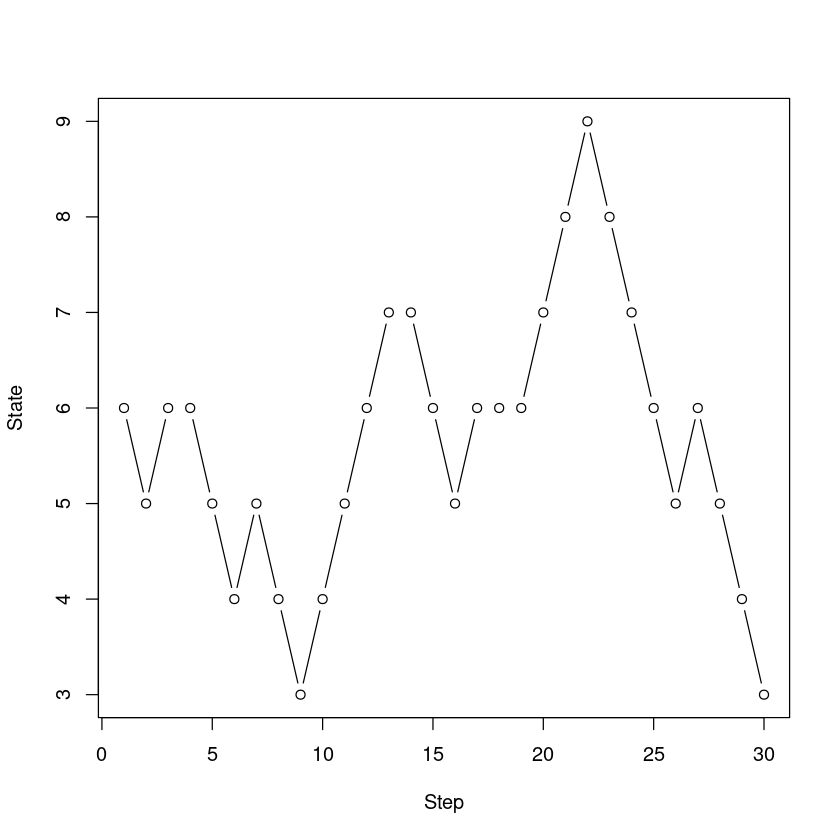

In [118]:
P_reg3 = mat.or.vec(nr = N, nc = N)
P_reg3[1,1] = 0.6
P_reg3[2,1] = 0.4
P_reg3[N,N] = 0.6
P_reg3[N-1,N] = 0.4
for (i in 2:(N-1)) {
    P_reg3[i,i] = 0.2
    P_reg3[(i-1),i] = 0.4
    P_reg3[(i+1),i] = 0.4
}
tsteps = 30
p = rep(0, N)
p[6] = 1
mc = MC(p, P_reg3, tsteps)
v = rep(0, tsteps)
for (i in 1:N) {
    v = v + i* mc[,(i+1)]
}
plot(mc$step, v, type = "b", xlab = "Step", ylab = "State")

Let's add some bias towards movement to, say, the left.

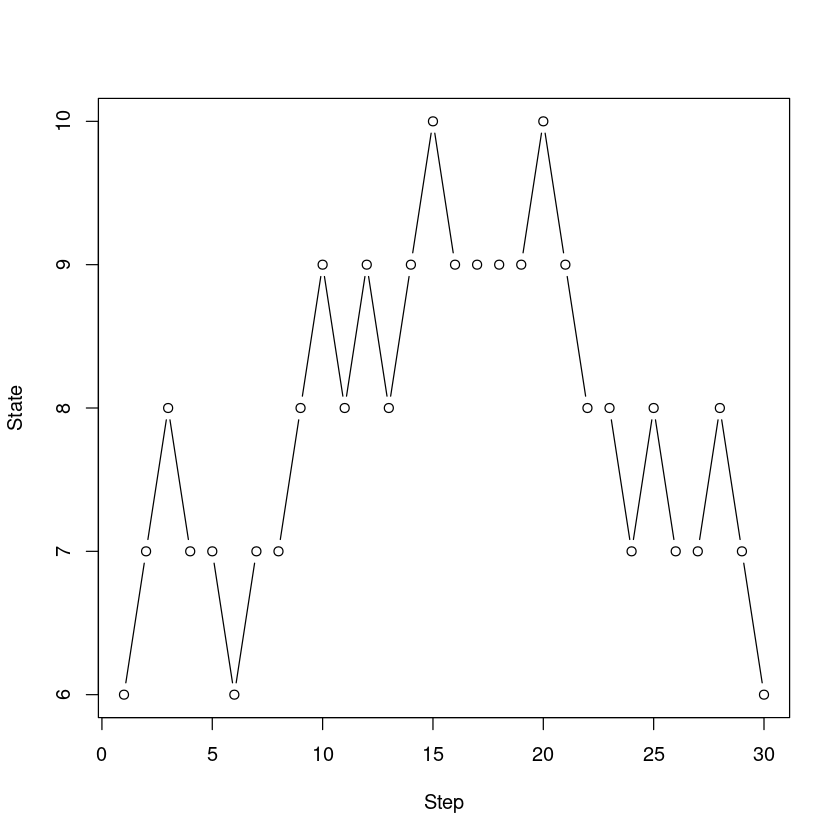

In [119]:
P_reg4 = mat.or.vec(nr = N, nc = N)
P_reg4[1,1] = 0.6
P_reg4[2,1] = 0.4
P_reg4[N,N] = 0.6
P_reg4[N-1,N] = 0.4
for (i in 2:(N-1)) {
    P_reg4[i,i] = 0.2
    P_reg4[(i-1),i] = 0.5
    P_reg4[(i+1),i] = 0.3
}
tsteps = 30
p = rep(0, N)
p[6] = 1
mc = MC(p, P_reg4, tsteps)
v = rep(0, tsteps)
for (i in 1:N) {
    v = v + i* mc[,(i+1)]
}
plot(mc$step, v, type = "b", xlab = "Step", ylab = "State")

## A few absorbing cases
### The genetic example with mating with GG individuals at each step

In [120]:
P_abs1 = matrix(c(1, 0.5, 0,
                  0, 0.5, 1,
                  0, 0, 0),
                nr = 3, byrow = TRUE)

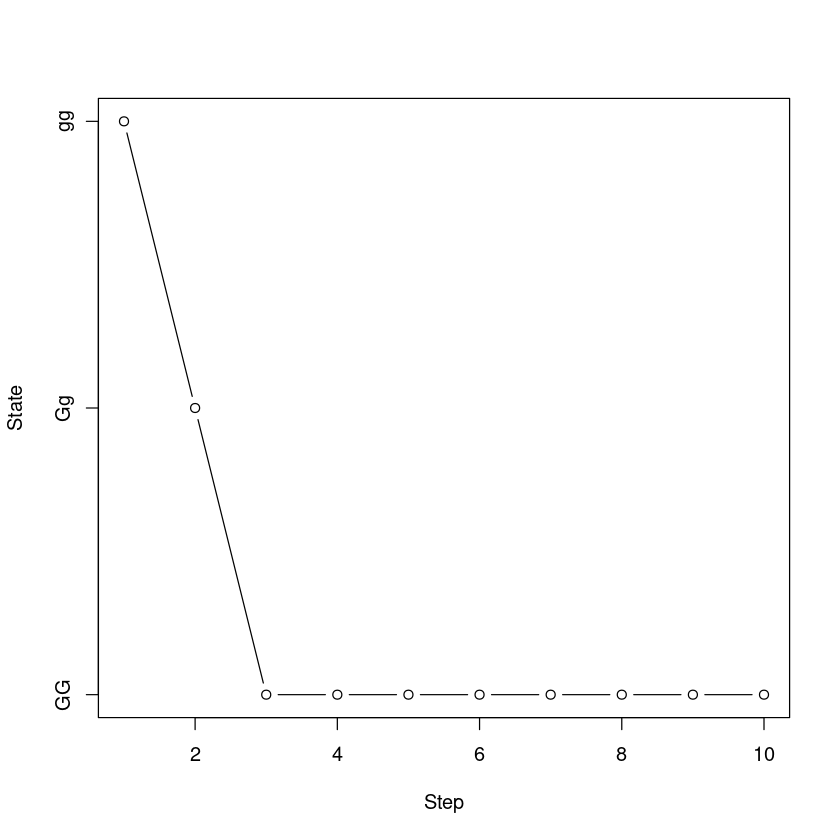

In [121]:
mc = MC(c(0,0,1), P_abs1, 10)
colnames(mc) = c("step", "GG", "Gg", "gg")
v = mc$GG + mc$Gg*2 + mc$gg*3
plot(mc$step, v, type = "b", xlab = "Step", ylab = "State", yaxt = "n")
axis(2, at = c(1,2,3), label = c("GG", "Gg", "gg"))

### A random walk with absorbing states at both ends

In [122]:
N = 11
P_abs2 = mat.or.vec(nr = N, nc = N)
P_abs2[1,1] = 1
P_abs2[N,N] = 1
for (i in 2:(N-1)) {
    P_abs2[i,i] = 0.5
    P_abs2[i,(i-1)] = 0.25
    P_abs2[i,(i+1)] = 0.25
}
P_abs2

1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25,0.00
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.25
0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


,step,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,0,0,0,0,0,1,0,0,0,0,0
tmp,2,0,0,0,0,0,1,0,0,0,0,0
tmp.1,3,0,0,0,0,0,1,0,0,0,0,0
tmp.2,4,0,0,0,0,0,1,0,0,0,0,0
tmp.3,5,0,0,0,0,0,1,0,0,0,0,0
tmp.4,6,0,0,0,0,0,1,0,0,0,0,0


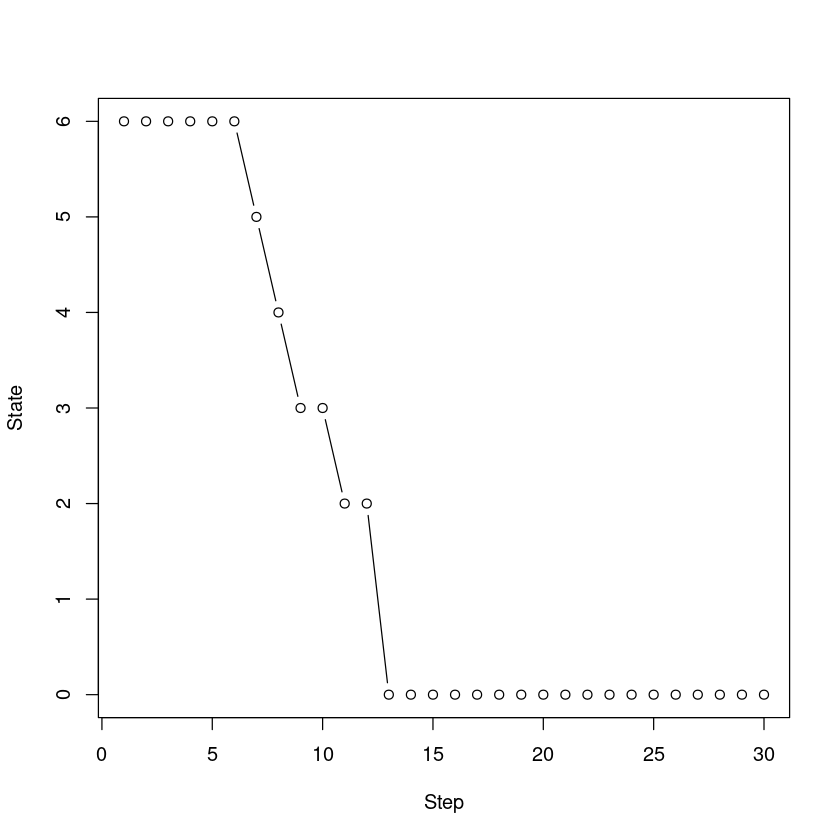

In [123]:
tsteps = 30
p = rep(0, N)
p[6] = 1
mc = MC(p, P_abs2, tsteps)
head(mc)
v = rep(0, tsteps)
for (i in 1:N) {
    v = v + i* mc[,(i+1)]
}
plot(mc$step, v, type = "b", xlab = "Step", ylab = "State")


In [124]:
TT = t(P[c(1,10,2:9),c(1,10,2:9)])
Q = TT[3:10,3:10]
invN = diag(8)-Q
N = solve(invN)
N

ERROR: Error in (function (cond) : error in evaluating the argument 'x' in selecting a method for function 't': subscript out of bounds


In [ ]:
install.packages(c("markovchain","DTMCPack"))